 Pymaceuticals Inc.
---

## Analysis

- Add your analysis here.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_metadata_study_results_combined_df = pd.merge(study_results_df, mouse_metadata_df, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_metadata_study_results_combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.

total_number_of_mice = len(mouse_metadata_study_results_combined_df["Mouse ID"].value_counts())
total_number_of_mice


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

grouped_by_mice_names_timepoint_df = mouse_metadata_study_results_combined_df.groupby(["Mouse ID"])["Timepoint"].value_counts()
abc = pd.DataFrame({'Number of Occurance': grouped_by_mice_names_timepoint_df})
duplicate_mice = abc.loc[(abc["Number of Occurance"] > 1)]
duplicate_mice.index

MultiIndex([('g989',  0),
            ('g989',  5),
            ('g989', 10),
            ('g989', 15),
            ('g989', 20)],
           names=['Mouse ID', 'Timepoint'])

In [4]:
mouse_metadata_study_results_combined_for_duplicate_df = mouse_metadata_study_results_combined_df.loc[(mouse_metadata_study_results_combined_df["Mouse ID"] =="g989")]
mouse_metadata_study_results_combined_for_duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
mouse_metadata_study_results_combined_final_df = mouse_metadata_study_results_combined_df.loc[(mouse_metadata_study_results_combined_df["Mouse ID"] !="g989")]
mouse_metadata_study_results_combined_final_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
number_of_mice_for_analysis = len(mouse_metadata_study_results_combined_final_df["Mouse ID"].value_counts())
number_of_mice_for_analysis

248

In [7]:
mouse_metadata_study_results_combined_final_byDrugName_df = mouse_metadata_study_results_combined_final_df.set_index("Drug Regimen")
mouse_metadata_study_results_combined_final_byDrugName_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,0,45.000000,0,Female,9,22
Ketapril,f932,0,45.000000,0,Male,15,29
Ketapril,g107,0,45.000000,0,Female,2,29
Ketapril,a457,0,45.000000,0,Female,11,30
Ketapril,c819,0,45.000000,0,Male,21,25
...,...,...,...,...,...,...,...
Capomulin,r944,45,41.581521,2,Male,12,25
Capomulin,u364,45,31.023923,3,Male,18,17
Ceftamin,p438,45,61.433892,1,Female,11,26


In [8]:
study_mean = mouse_metadata_study_results_combined_final_byDrugName_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
study_mean
study_median = mouse_metadata_study_results_combined_final_byDrugName_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
study_median
study_var = mouse_metadata_study_results_combined_final_byDrugName_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
study_var
study_std = mouse_metadata_study_results_combined_final_byDrugName_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
study_std
study_sem = mouse_metadata_study_results_combined_final_byDrugName_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
study_sem

summary_stats = pd.concat([study_mean, study_median, study_var, study_std, study_sem], axis=1)
summary_stats_cols = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']
summary_stats.columns = summary_stats_cols
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
total_number_of_row_for_each_drug = mouse_metadata_study_results_combined_final_df["Drug Regimen"].value_counts()
total_number_of_row_for_each_drug 

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(38.097222222222214, 0.5, '# of Observed Mouse Timpoints')

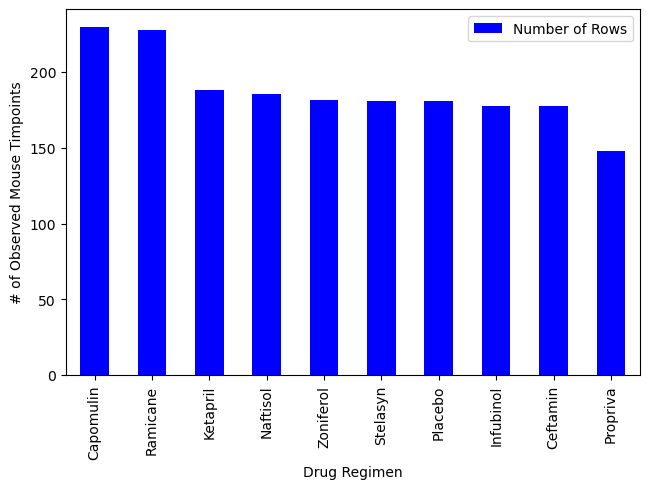

In [10]:
data_frame_to_create_bar_chart = pd.DataFrame({'Number of Rows':total_number_of_row_for_each_drug })
data_frame_to_create_bar_chart
figure_1 = data_frame_to_create_bar_chart.plot(kind='bar', color="blue", align="center")
plt.tight_layout()
figure_1.set_xlabel('Drug Regimen')
figure_1.set_ylabel('# of Observed Mouse Timpoints')

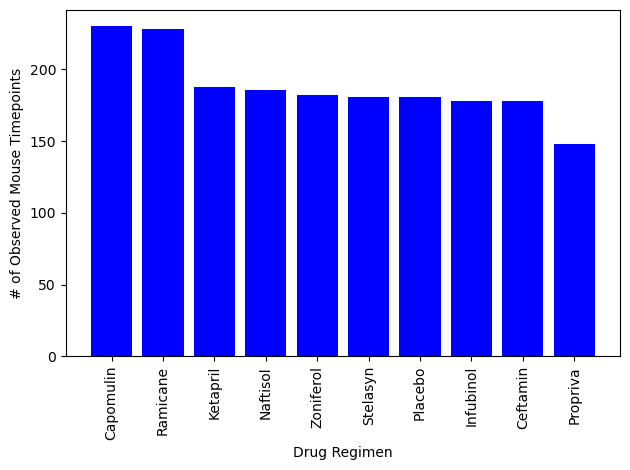

In [11]:
number_of_rows = data_frame_to_create_bar_chart['Number of Rows']
index_for_rows = data_frame_to_create_bar_chart.index
index_for_rows
x_axis = np.arange(len(data_frame_to_create_bar_chart))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, data_frame_to_create_bar_chart['Number of Rows'], color="blue", align="center")
plt.xticks(tick_locations, index_for_rows, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Sex')

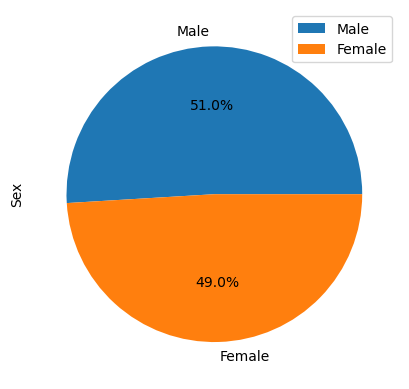

In [12]:
male_female_count = mouse_metadata_study_results_combined_final_df["Sex"].value_counts()
male_female_count
data_frame_to_create_pie_chart = pd.DataFrame({'Gender':male_female_count})
data_frame_to_create_pie_chart
figure_2 = data_frame_to_create_pie_chart.plot(kind='pie', y = 'Gender', autopct="%1.1f%%")
figure_2.set_ylabel('Sex')

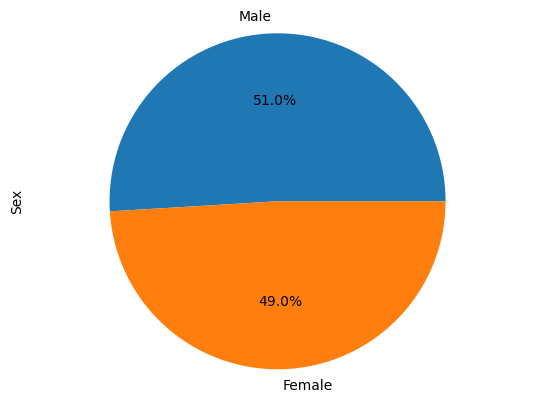

In [13]:
plt.pie(male_female_count, labels=male_female_count.index, autopct="%1.1f%%")
plt.axis("equal")
plt.ylabel("Sex")
plt.show()

In [14]:
last_timepoint_for_each_mouse = mouse_metadata_study_results_combined_final_df.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint_for_each_mouse = last_timepoint_for_each_mouse.reset_index()
last_timepoint_for_each_mouse_df = pd.DataFrame(last_timepoint_for_each_mouse)
last_timepoint_for_each_mouse_df.rename(columns = {"Timepoint" : "Timepoint_last"}, inplace = True)
last_timepoint_for_each_mouse_df
merged_dataframes_for_iqr_calculations_df = pd.merge(mouse_metadata_study_results_combined_final_df, last_timepoint_for_each_mouse_df, how="left", on=["Mouse ID", "Mouse ID"])
merged_dataframes_for_iqr_calculations_df
mouse_last_timepoint_last_volume_df = merged_dataframes_for_iqr_calculations_df.loc[(merged_dataframes_for_iqr_calculations_df["Timepoint"] == merged_dataframes_for_iqr_calculations_df["Timepoint_last"])]
mouse_last_timepoint_last_volume_df
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_volumes = pd.DataFrame ()
outliers_values = pd.DataFrame ()

for x in range (4):
    name = treatment [x]
    drug_name = mouse_last_timepoint_last_volume_df.loc[(mouse_last_timepoint_last_volume_df["Drug Regimen"] == name)]
    last_volumes = drug_name["Tumor Volume (mm3)"].values
    last_volumes
    final_volumes[name] = pd.DataFrame(last_volumes)
    
print(final_volumes)

for x in range (4):
    name = treatment[x]
    quartiles = final_volumes[name].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier_points = final_volumes.loc[(final_volumes[name] < lower_bound) | (final_volumes[name] > upper_bound)]
    outliers = outlier_points[name].values
    outliers_values[name] = pd.DataFrame(outliers)
    
print(outliers_values)

    Capomulin   Ramicane  Infubinol   Ceftamin
0   39.952347  43.166373  36.321346  45.000000
1   46.539206  44.183451  46.250112  45.000000
2   30.485985  43.419381  47.010364  45.000000
3   38.753265  38.342008  45.699331  45.000000
4   38.982878  36.561652  51.542431  47.784682
5   34.455298  31.095335  54.048608  46.784535
6   41.483008  38.407618  50.005138  48.722078
7   37.074024  45.220869  55.650681  52.925348
8   32.377357  36.374510  60.969711  56.057749
9   40.159220  30.276232  54.656549  55.742829
10  31.896238  30.638696  57.031862  57.918381
11  33.329098  40.659006  58.268442  64.192341
12  38.846876  30.564625  60.165180  59.851956
13  40.658124  22.050126  55.629428  64.729837
14  38.939633  33.397653  62.117279  68.594745
15  36.041047  36.134852  67.289621  61.849023
16  28.430964  31.560470  67.685569  67.527482
17  28.484033  43.047543  72.226731  67.748662
18  23.343598  37.311236  62.754451  64.634949
19  37.311846  38.810366  65.525743  62.999356
20  40.728578

In [15]:
last_timepoint_for_each_mouse = mouse_metadata_study_results_combined_final_df.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint_for_each_mouse = last_timepoint_for_each_mouse.reset_index()
last_timepoint_for_each_mouse_df = pd.DataFrame(last_timepoint_for_each_mouse)
last_timepoint_for_each_mouse_df.rename(columns = {"Timepoint" : "Timepoint_last"}, inplace = True)
last_timepoint_for_each_mouse_df
merged_dataframes_for_iqr_calculations_df = pd.merge(mouse_metadata_study_results_combined_final_df, last_timepoint_for_each_mouse_df, how="left", on=["Mouse ID", "Mouse ID"])
merged_dataframes_for_iqr_calculations_df
mouse_last_timepoint_last_volume_df = merged_dataframes_for_iqr_calculations_df.loc[(merged_dataframes_for_iqr_calculations_df["Timepoint"] == merged_dataframes_for_iqr_calculations_df["Timepoint_last"])]
mouse_last_timepoint_last_volume_df
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volumes = []
final_tumor_volumes_values_only =[]
outliers = []
final_volumes = pd.DataFrame ()
for x in range (4):
    name = treatment [x]
    drug_name = mouse_last_timepoint_last_volume_df.loc[(mouse_last_timepoint_last_volume_df["Drug Regimen"] == name)]
    last_volumes = drug_name["Tumor Volume (mm3)"].values
    last_volumes
    final_tumor_volumes.append(drug_name)
    final_tumor_volumes_values_only.append(last_volumes)
    
print(final_tumor_volumes)


for x in range (4):
    name = treatment [x]
    drug_name = mouse_last_timepoint_last_volume_df.loc[(mouse_last_timepoint_last_volume_df["Drug Regimen"] == name)]
    last_volumes = drug_name["Tumor Volume (mm3)"].values
    last_volumes
    final_volumes[name] = pd.DataFrame(last_volumes)
    
#print(final_volumes)

for x in range (4):
    name = treatment[x]
    quartiles = final_volumes[name].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier_points = final_volumes.loc[(final_volumes[name] < lower_bound) | (final_volumes[name] > upper_bound)]
    outliers = outlier_points[name].values
    outliers_values[name] = pd.DataFrame(outliers)
    
print(outliers_values)

[     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
645      w150         10           39.952347                 0    Capomulin   
795      r157         15           46.539206                 0    Capomulin   
922      f966         20           30.485985                 0    Capomulin   
1485     j246         35           38.753265                 1    Capomulin   
1751     b128         45           38.982878                 2    Capomulin   
1756     t565         45           34.455298                 0    Capomulin   
1758     l509         45           41.483008                 3    Capomulin   
1764     g288         45           37.074024                 1    Capomulin   
1775     r554         45           32.377357                 3    Capomulin   
1778     g316         45           40.159220                 2    Capomulin   
1784     y793         45           31.896238                 2    Capomulin   
1787     m957         45           33.329098       

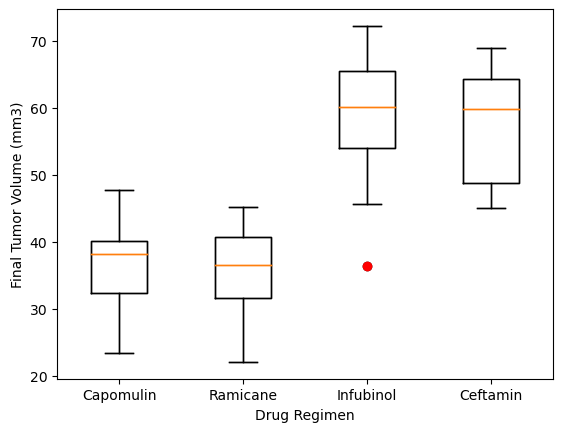

In [16]:
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(final_tumor_volumes_values_only)
pb = ax1.boxplot(final_tumor_volumes_values_only)
plt.setp(pb['boxes'], color='black')
plt.setp(pb['whiskers'], color='black')
plt.setp(pb['fliers'], markeredgecolor='red', markerfacecolor="red")
x_axis = np.arange(1, 5)
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.xticks(tick_locations, treatment)
plt.show()

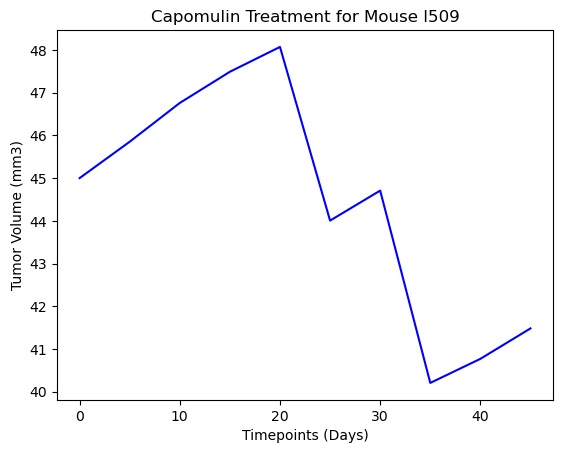

In [17]:
drug_capomulin = mouse_metadata_study_results_combined_final_df.loc[(mouse_metadata_study_results_combined_final_df["Drug Regimen"] == "Capomulin")]
drug_capomulin
mouse_l509_drug_capomulin = drug_capomulin.loc[(drug_capomulin["Mouse ID"] == "l509")]
mouse_l509_drug_capomulin
plt.plot(mouse_l509_drug_capomulin["Timepoint"], mouse_l509_drug_capomulin["Tumor Volume (mm3)"], color="blue")
plt.title("Capomulin Treatment for Mouse l509")
plt.xlabel("Timepoints (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

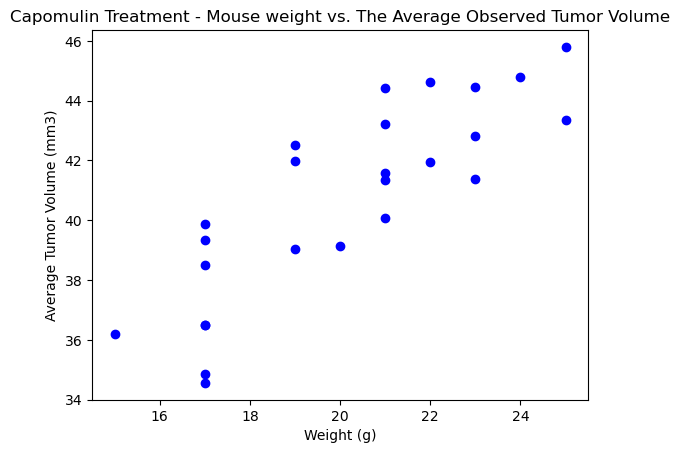

In [18]:
drug_capomulin_ave_tumor_volume = drug_capomulin.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()
drug_capomulin_ave_tumor_volume_weight = pd.DataFrame ({'Average Tumor Volume (mm3)':drug_capomulin_ave_tumor_volume})
drug_capomulin_ave_tumor_volume_weight

drug_capomulin_ave_tumor_volume_weight = drug_capomulin_ave_tumor_volume_weight.reset_index()
drug_capomulin_ave_tumor_volume_weight
x_values = drug_capomulin_ave_tumor_volume_weight["Weight (g)"]
y_values = drug_capomulin_ave_tumor_volume_weight["Average Tumor Volume (mm3)"]
plt.scatter(x_values, y_values, color="blue", marker="o",)
plt.title("Capomulin Treatment - Mouse weight vs. The Average Observed Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

y = 0.95x + 21.55
The correlation between mouse weight and the average tumor volume is: 0.71


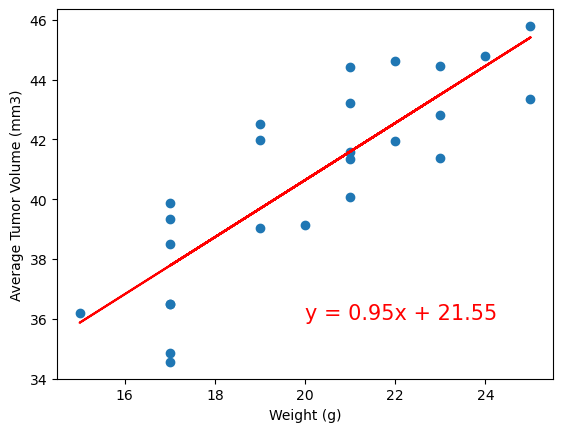

In [24]:
drug_capomulin_ave_tumor_volume = drug_capomulin.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()
drug_capomulin_ave_tumor_volume_weight = pd.DataFrame ({'Average Tumor Volume (mm3)':drug_capomulin_ave_tumor_volume})
drug_capomulin_ave_tumor_volume_weight
drug_capomulin_ave_tumor_volume_weight = drug_capomulin_ave_tumor_volume_weight.reset_index()
drug_capomulin_ave_tumor_volume_weight
x_values = drug_capomulin_ave_tumor_volume_weight["Weight (g)"]
y_values = drug_capomulin_ave_tumor_volume_weight["Average Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(line_eq)
print(f"The correlation between mouse weight and the average tumor volume is: {round(rvalue**2, 2)}")
plt.show()